In [1]:
#Tracking
from numpy.random import seed
seed(2)

In [98]:
#Dependencies
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import numpy as np
import pandas as pd

In [3]:
import tensorflow

In [277]:
#Import data
nums = pd.read_csv('Ekata/fucking_ekata_numbers.csv')
numbers = nums.drop(columns=['OFFICE_TELEPHONE','Index'])

In [323]:
#Define X and y
X = numbers.drop("label",axis = 1)
y = numbers['label']
print(X.shape, y.shape)

(299, 22) (299,)


In [279]:
#More dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [356]:
#Split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8, stratify = y)

In [361]:
#Scale
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\vigrose\AppData\Local\Programs\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [362]:
#Encode labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [377]:
#One-hot encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [285]:
#modelsss
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [364]:
#Define model
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=22))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [365]:
#Compile
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [366]:
#Summarize
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 50)                1150      
_________________________________________________________________
dense_55 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_56 (Dense)             (None, 2)                 102       
Total params: 3,802
Trainable params: 3,802
Non-trainable params: 0
_________________________________________________________________


In [367]:
#Fit model
history = model.fit(X_train_scaled,
         y_train_categorical,
         epochs=80,
         shuffle=True,
         verbose=2
         )

Epoch 1/80
224/224 - 0s - loss: 0.6862 - acc: 0.5759
Epoch 2/80
224/224 - 0s - loss: 0.6521 - acc: 0.6920
Epoch 3/80
224/224 - 0s - loss: 0.6257 - acc: 0.7143
Epoch 4/80
224/224 - 0s - loss: 0.6008 - acc: 0.7098
Epoch 5/80
224/224 - 0s - loss: 0.5796 - acc: 0.7054
Epoch 6/80
224/224 - 0s - loss: 0.5607 - acc: 0.7188
Epoch 7/80
224/224 - 0s - loss: 0.5477 - acc: 0.7321
Epoch 8/80
224/224 - 0s - loss: 0.5376 - acc: 0.7143
Epoch 9/80
224/224 - 0s - loss: 0.5269 - acc: 0.7321
Epoch 10/80
224/224 - 0s - loss: 0.5218 - acc: 0.7277
Epoch 11/80
224/224 - 0s - loss: 0.5131 - acc: 0.7411
Epoch 12/80
224/224 - 0s - loss: 0.5132 - acc: 0.7500
Epoch 13/80
224/224 - 0s - loss: 0.5045 - acc: 0.7545
Epoch 14/80
224/224 - 0s - loss: 0.5011 - acc: 0.7411
Epoch 15/80
224/224 - 0s - loss: 0.4948 - acc: 0.7545
Epoch 16/80
224/224 - 0s - loss: 0.4947 - acc: 0.7679
Epoch 17/80
224/224 - 0s - loss: 0.4872 - acc: 0.7679
Epoch 18/80
224/224 - 0s - loss: 0.4850 - acc: 0.7634
Epoch 19/80
224/224 - 0s - loss: 0.48

dict_keys(['loss', 'acc'])


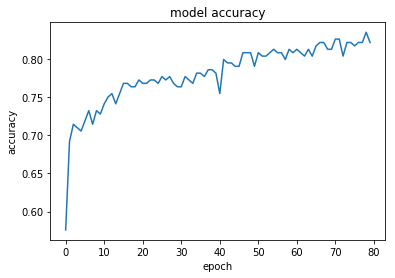

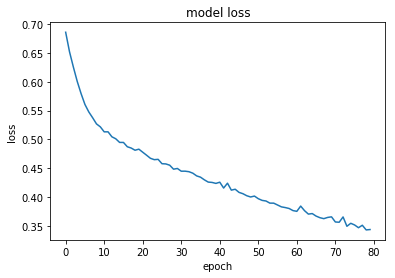

In [368]:
# summarize history for accuracy
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [369]:
#Final accuracy.loss on testing set
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f'Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}')

75/75 - 0s - loss: 0.7048 - acc: 0.7200
Normal Neural Network - Loss: 0.7048420929908752, Accuracy: 0.7200000286102295


In [370]:
#Get predictions
predictions = model.predict_classes(X_test_scaled)
prediction_labels = label_encoder.inverse_transform(predictions)

In [371]:
#Print predictions
data = {'Predicted': prediction_labels, 'Actual':list(y_test)}
pd.DataFrame(data)

,Predicted,Actual
0,connected,disconnected
1,connected,disconnected
2,disconnected,disconnected
3,disconnected,disconnected
4,connected,connected
5,disconnected,disconnected
6,connected,disconnected
7,connected,connected
8,disconnected,connected
9,disconnected,disconnected


In [372]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(list(y_test), prediction_labels, labels = ['disconnected','connected'])

array([[26, 12],
       [ 9, 28]], dtype=int64)

In [376]:
#Save model
model.save("ekata_model_trained_final.h5")

In [ ]:
#Consolidate predictions and data
X_test['Predictions']=prediction_labels
X_test['Actual']=list(y_test)

In [374]:
#Do this nonsense
X_test.to_csv('ekata_X_test_thursday.csv')
all_nums=nums[['Index', 'OFFICE_TELEPHONE']]
X_test_2 = pd.read_csv('ekata_X_test_thursday.csv')
X_test_2 = X_test_2.rename(columns={'Unnamed: 0': 'Index'})
X_test_with_nums = pd.merge(all_nums, X_test_2, on = 'Index')
#     X_test_with_nums['Predicted'] = prediction_labels
#     X_test_with_nums['Actual'] = list(y_test)
#     x_succinct = X_test_with_nums[['OFFICE_TELEPHONE', 'Predicted', 'Actual']]
# #     x_succinct.to_csv('x_succinct.csv', index = False)

In [375]:
#Export to csv 
x_succinct = X_test_with_nums[['OFFICE_TELEPHONE', 'Predictions', 'Actual']]
x_succinct.to_csv('x_succinct.csv', index = False)

In [382]:
X_train
X_train.to_csv('ekata_X_train_thursday.csv')
all_nums=nums[['Index', 'OFFICE_TELEPHONE']]
X_train_2 = pd.read_csv('ekata_X_train_thursday.csv')
X_train_2 = X_train_2.rename(columns={'Unnamed: 0': 'Index'})
X_train_with_nums = pd.merge(all_nums, X_train_2, on = 'Index')

In [ ]:
X_train_wtih_nums.to_csv()